# Download ATL06/ATL08 Data from NSIDC server
Should work with any random area (either shapefile or coordinates of box)

## Inputs:
    - define the folder to download and process files
    - shapefile with defined projection (can be be in any system)
    - or coordinates of box [lowerleft, upper right] or coordinates in lat/lon coordinate system

In [1]:
%matplotlib inline

In [2]:
import math
import os
import shutil
#import pprint
import time
from datetime import timedelta

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import geopandas as gpd
from shapely.geometry import Point, Polygon #, mapping
#from shapely.geometry.polygon import orient
from statistics import mean
import h5py
import json
import zipfile
import io

import requests
import getpass
import socket
#from requests.auth import HTTPBasicAuth
import logging

import hvplot
import hvplot.pandas
import geoviews as gv

## 1. Choose output Directory

In [3]:
short_name = 'ATL06' #'ATL08' #'ATL06'

In [4]:
region = 'rema_02_peninsula_north'
icesat2_path = f'/fs/project/howat.4/icesat2/antarctica_{short_name}/{region}'
shp_files = [f for f in os.listdir(icesat2_path) if f.endswith('.shp') and short_name in f]
len(shp_files)

112

In [5]:
cols = ['h_li', 'q_flag', 'strip', 'geometry']
count = 0
for f in shp_files:
    date_time = f.split('_')[2]
    count += 1
    if count ==1:
        gdf = gpd.read_file(f'{icesat2_path}/{f}')
        gdf = gdf[cols]
        gdf['date_time'] = date_time
        gdf['idx'] = count
        
    else:
        temp = gpd.read_file(f'{icesat2_path}/{f}')
        temp = temp[cols]
        temp['date_time'] = date_time
        temp['idx'] = count
        gdf = pd.concat([gdf, temp], axis=0)

In [6]:
print(len(gdf))

3467538


In [7]:
gdf.head()

,h_li,q_flag,strip,geometry,date_time,idx
0,5.609316,1,gt1l,POINT (-68.01940 -68.99329),20181202180311,1
1,167.608994,1,gt1l,POINT (-68.05931 -68.87420),20181202180311,1
2,98.223701,1,gt1l,POINT (-68.06263 -68.86427),20181202180311,1
3,-11.231202,1,gt1l,POINT (-68.08265 -68.80437),20181202180311,1
4,40.617523,1,gt1l,POINT (-68.08841 -68.78700),20181202180311,1


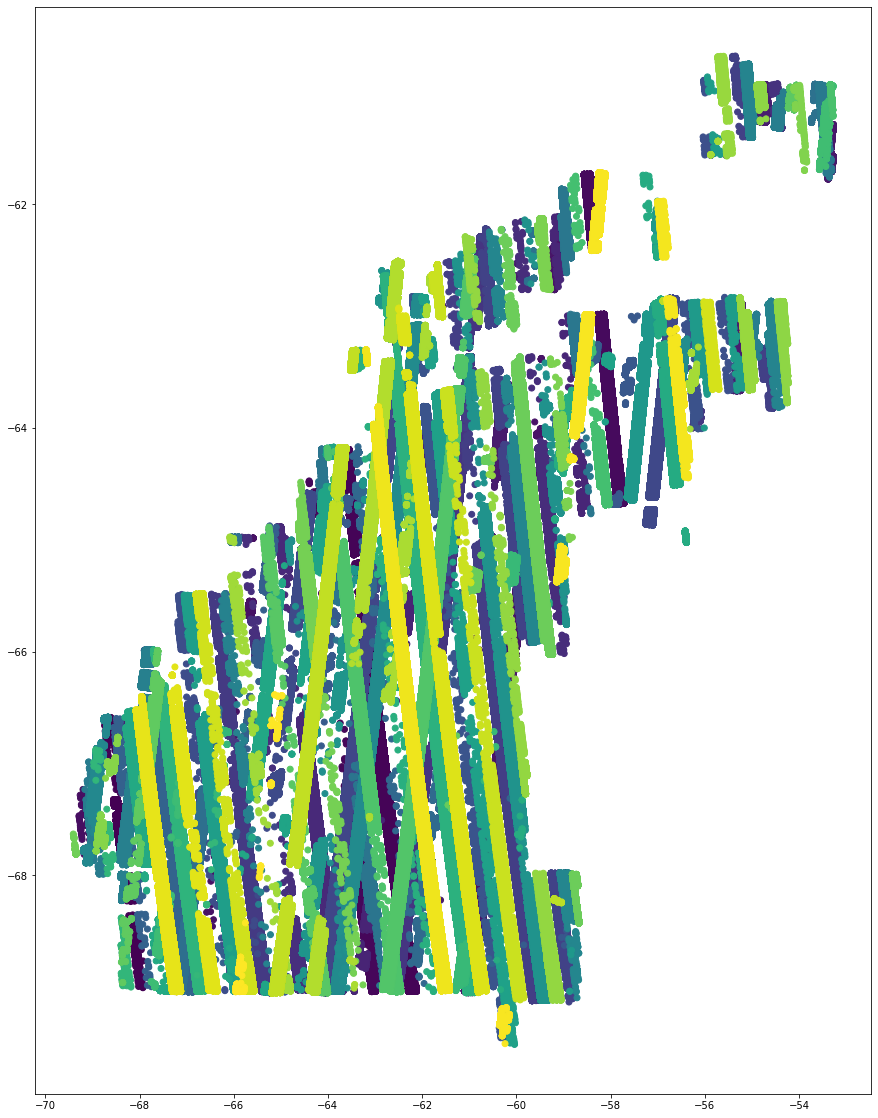

In [15]:
gdf.plot(column = 'idx', figsize=(20,20));

In [13]:
region

'rema_02_peninsula_north'

In [14]:
gdf.to_file(f'/fs/project/howat.4/icesat2/prototyping/antarctica_ATL06/{region}.gpkg', driver='GPKG')

In [56]:
# gdf.bounds